# 程序猿王大锤的十九大解读

十九大马上已经圆满结束啦，王大锤和他和Python也想来蹭热点了~ 

报告中提到了哪些关键词呢？和上一届有哪些不同呢？政治经济文化，究竟哪个更重要？未来五年，我国行业可能有什么动向？我国金融改革如何继续？台湾问题何去何从？

这些问题，王大锤也不知道……

注：本报告纯属娱乐，仅用于说明自然语言处理的一般流程和分词工具的使用方法，如有雷同，全是巧合。

感谢以下Python库的大力支持：
+ “结巴”中文分词：做最好的 Python 中文分词组件 https://github.com/fxsjy/jieba）
+ wordcloud：A little word cloud generator in Python. https://github.com/amueller/word_cloud
+ 以及其他所有用到的类库~

In [2]:
import jieba
import jieba.analyse
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from functools import *
import re
import pandas as pd
%matplotlib inline

In [3]:
txt_19 = open('./media/txt_19.txt','r').read()

## 关键词提取

本部分主要是提取文章关键词构建词云，来直观体现文章主旨。词云中越大的词越重要。

结巴分词API
jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
+ sentence 为待提取的文本
+ topK 为返回几个 TF/IDF 权重最大的关键词，默认值为 20
+ withWeight 为是否一并返回关键词权重值，默认值为 False
+ allowPOS 仅包括指定词性的词，默认值为空，即不筛选

In [105]:
word_vec_19 = jieba.analyse.extract_tags(txt_19,topK=100,withWeight=True,allowPOS='n')
word_vec_19

[('社会主义', 0.2057132467345788),
 ('人民', 0.18082467538178423),
 ('特色', 0.11438455557167367),
 ('全面', 0.1081783068339266),
 ('制度', 0.09481639823361265),
 ('政治', 0.09083959208737565),
 ('体系', 0.08765575493774928),
 ('国家', 0.07960205290612424),
 ('社会', 0.07940784683740879),
 ('时代', 0.07669661912564228),
 ('文化', 0.07425949074790625),
 ('民主', 0.06607717765610435),
 ('法治', 0.06019526841175327),
 ('生态', 0.05238224301951802),
 ('全党', 0.049558941625304),
 ('经济', 0.0466231724331373),
 ('战略', 0.04578384954372761),
 ('领导', 0.041838156125836835),
 ('思想', 0.03706098352305992),
 ('民族', 0.03515716097266416),
 ('协商', 0.03469467609221534),
 ('强国', 0.033809645870395755),
 ('小康社会', 0.033704426377514925),
 ('强军', 0.03363804774923723),
 ('群众', 0.03329670125469821),
 ('基本', 0.032906449384943616),
 ('世界', 0.032831306608308644),
 ('党的领导', 0.03103266483432456),
 ('问题', 0.03067056711426045),
 ('体制', 0.030178504479327878),
 ('事业', 0.02951702197892328),
 ('能力', 0.029461477583592747),
 ('人类', 0.028632607906942296),
 

In [99]:
redflag_mask = np.array(Image.open('./media/MTQ2MDkxNTA1NjU2OS0yMDQ3MTkzNTk5.jpg'))
image_colors = ImageColorGenerator(redflag_mask)

In [100]:
wc = WordCloud(font_path='/usr/share/fonts/wqy-microhei/wqy-microhei.ttc',mask=redflag_mask,color_func=image_colors,
               background_color='gold')

效果图

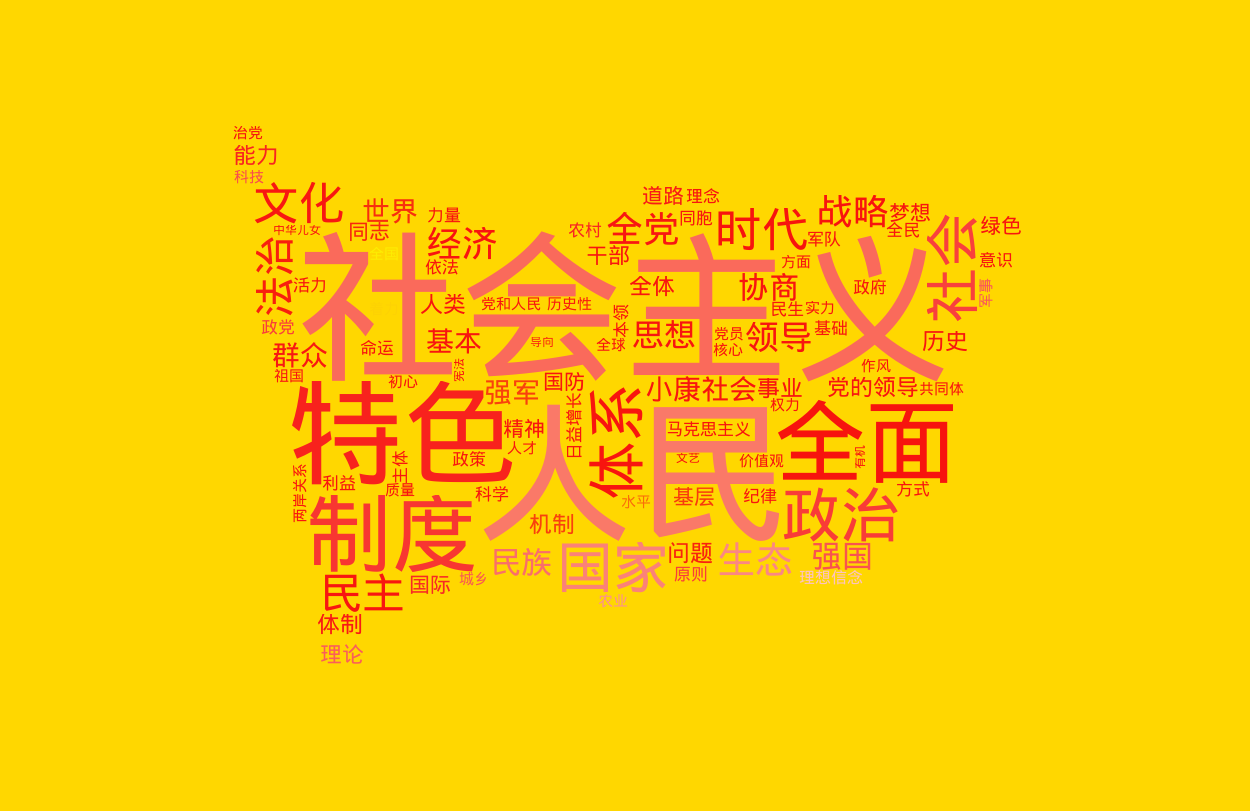

In [106]:
pic_19 = wc.generate_from_frequencies(dict(word_vec_19))
pic_19.to_image()

In [4]:
txt_18 = open('./media/txt_18.txt','r').read()

In [107]:
word_vec_18 = jieba.analyse.extract_tags(txt_19,topK=100,withWeight=True,allowPOS='n')
word_vec_18

[('社会主义', 0.2057132467345788),
 ('人民', 0.18082467538178423),
 ('特色', 0.11438455557167367),
 ('全面', 0.1081783068339266),
 ('制度', 0.09481639823361265),
 ('政治', 0.09083959208737565),
 ('体系', 0.08765575493774928),
 ('国家', 0.07960205290612424),
 ('社会', 0.07940784683740879),
 ('时代', 0.07669661912564228),
 ('文化', 0.07425949074790625),
 ('民主', 0.06607717765610435),
 ('法治', 0.06019526841175327),
 ('生态', 0.05238224301951802),
 ('全党', 0.049558941625304),
 ('经济', 0.0466231724331373),
 ('战略', 0.04578384954372761),
 ('领导', 0.041838156125836835),
 ('思想', 0.03706098352305992),
 ('民族', 0.03515716097266416),
 ('协商', 0.03469467609221534),
 ('强国', 0.033809645870395755),
 ('小康社会', 0.033704426377514925),
 ('强军', 0.03363804774923723),
 ('群众', 0.03329670125469821),
 ('基本', 0.032906449384943616),
 ('世界', 0.032831306608308644),
 ('党的领导', 0.03103266483432456),
 ('问题', 0.03067056711426045),
 ('体制', 0.030178504479327878),
 ('事业', 0.02951702197892328),
 ('能力', 0.029461477583592747),
 ('人类', 0.028632607906942296),
 

前任的效果图

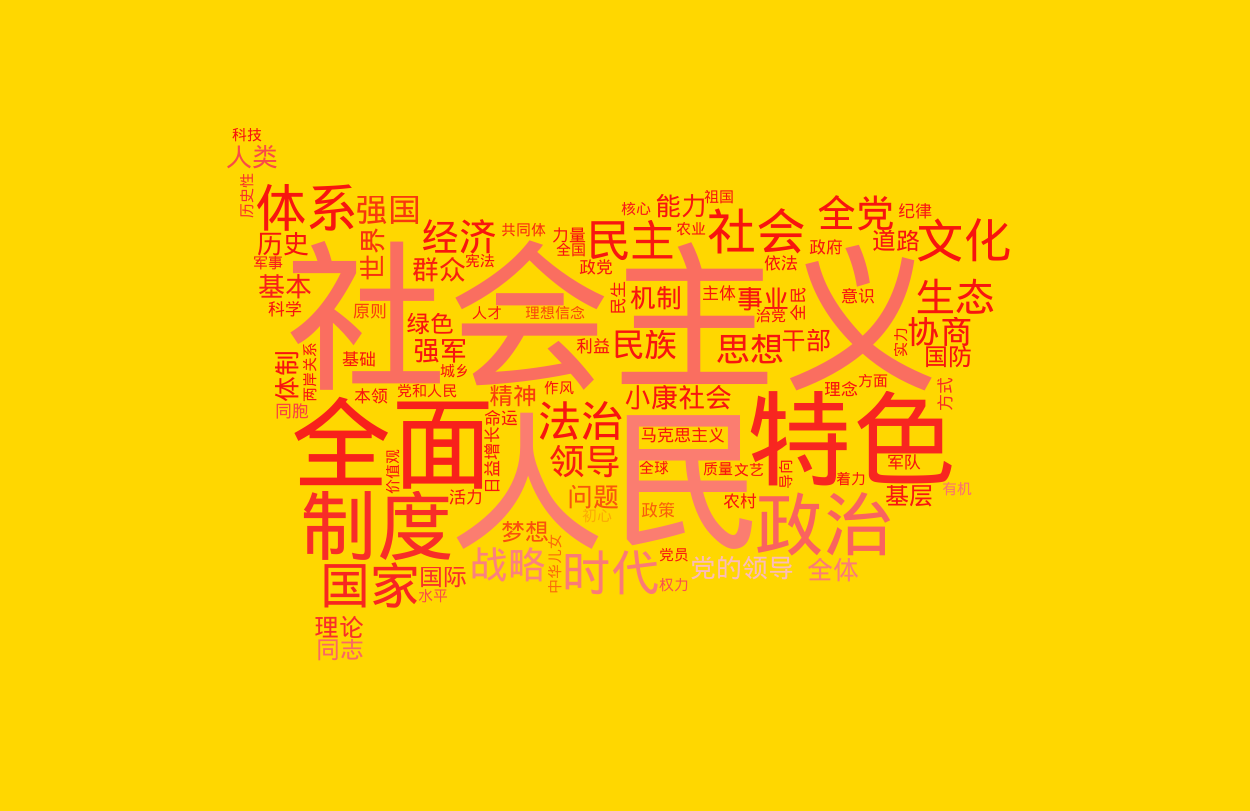

In [108]:
pic_18 = wc.generate_from_frequencies(dict(word_vec_18))
pic_18.to_image()

In [165]:
word_vec_18 = jieba.analyse.extract_tags(txt_18,topK = 300,withWeight=True,allowPOS='n')
word_vec_19 = jieba.analyse.extract_tags(txt_19,topK = 300,withWeight=True,allowPOS='n')

word_18 = [p[0] for p in word_vec_18]
word_19 = [p[0] for p in word_vec_19]

In [166]:
word_set_18 = set(word_18)
word_set_19 = set(word_19)

## 关键词对比分析

上面的分析虽然可以看出一些文章主旨，但是文章间的关系不算明朗，于是我们可以用集合运算的方式来进行关键词的对比分析

### 新时代，新字眼

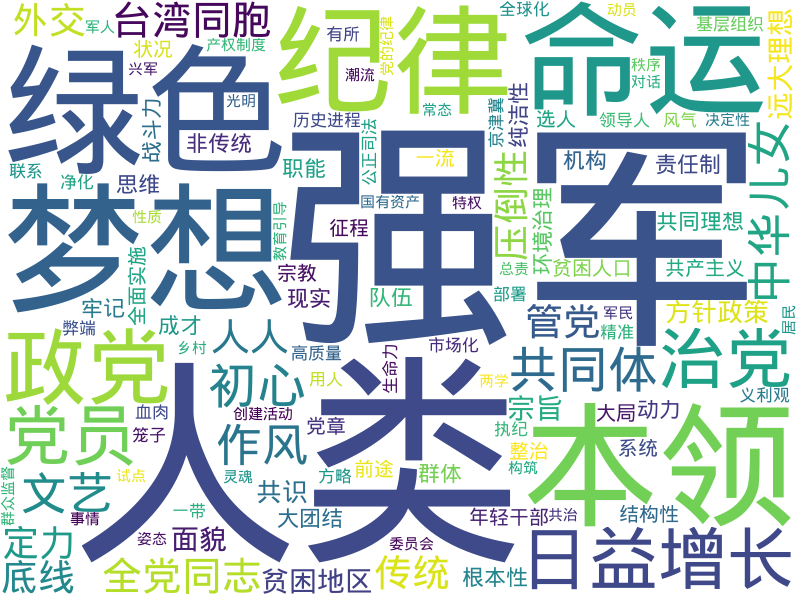

In [167]:
new_19 = word_set_19.difference(word_set_18)

new_wv_19 = list(filter(lambda s:s[0] in new_19,word_vec_19))
WordCloud(font_path='/usr/share/fonts/wqy-microhei/wqy-microhei.ttc',background_color='white',width=800,height=600)\
    .generate_from_frequencies(dict(new_wv_19)).to_image()

### 我们认为这些已经基本完成了

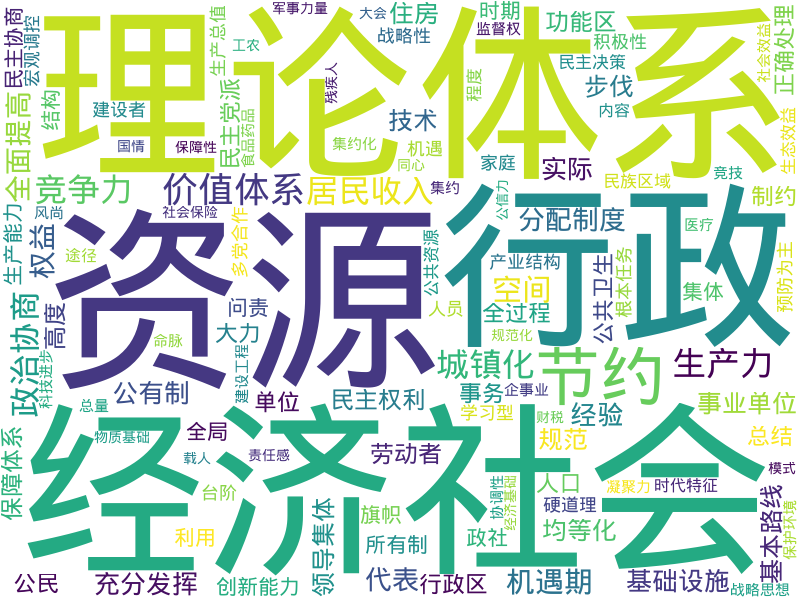

In [168]:
old_18 = word_set_18.difference(word_set_19)

old_wv_18 = list(filter(lambda s:s[0] in old_18,word_vec_18))
WordCloud(font_path='/usr/share/fonts/wqy-microhei/wqy-microhei.ttc',background_color='white',width=800,height=600)\
    .generate_from_frequencies(dict(old_wv_18)).to_image()

# 热度分析

从文章中寻找与关键字有关的句子，统计数量，作为关键词的热度

我们可以先看看政治文化经济三个维度比例

In [5]:
intrig_words = ['政治','经济','文化']
word_count = [0 for i in range(len(intrig_words))]

for s in re.split("。|！|\s+",txt_19):
    for i,w in enumerate(intrig_words):
        if w in s:
            word_count[i] += 1
            
word_count

[58, 51, 51]

([<matplotlib.patches.Wedge at 0x7f38a2653198>,
  <matplotlib.text.Text at 0x7f38a2664208>])

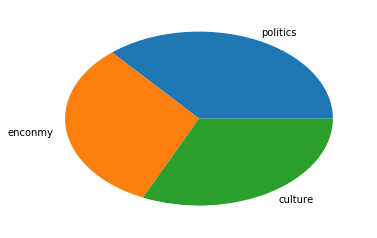

In [7]:
plt.pie(word_count,labels=['politics','enconmy','culture'])

嗯……看起来比较均衡

In [9]:
word_count = [0 for i in range(len(intrig_words))]

for s in re.split("。|！|\s+",txt_18):
    for i,w in enumerate(intrig_words):
        if w in s:
            word_count[i] += 1
            
word_count

[24, 66, 40]

([<matplotlib.patches.Wedge at 0x7f38a25632b0>,
  <matplotlib.text.Text at 0x7f38a2574320>])

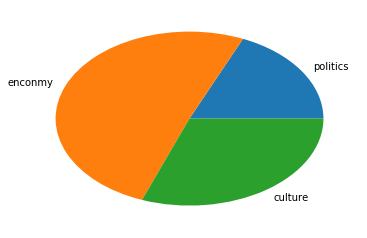

In [10]:
plt.pie(word_count,labels=['politics','enconmy','culture'])

前任比较看重经济

### 行业统计分析，统计包含行业关键字的句子在报告中出现的次数

In [208]:
industries = [['农','林','牧','渔'],
['能源','矿产'],
['冶金','钢铁'],
['食品','饮料'],
['纺织','服装'],
['家具','木材'],
['造纸','纸品'],
['印刷','包装'],
['石油','化工'],
['器械','医药'],
['塑胶','五金'],
['机械','机电'],
['建材','卫浴'],
['电器','家电'],
['电子','通信'],
['IT'],
['灯饰','照明'],
['邮政','电信'],
['工艺','礼品'],
['钟表','珠宝'],
['眼镜','玩具'],
['交通','工具'],
['运输','物流'],
['仪器','仪表'],
['电力','水利'],
['供水','燃气'],
['建筑','装饰'],
['房地产'],
['金融','保险'],
['贸易','分销'],
['文化','艺术'],
['餐饮','娱乐'],
['教育'],
['医疗','卫生'],
['安防','消防'],
['服务业'],
['化妆品'],
['体育'],
['科研'],
['环保'],
['酒店','旅游'],
['进出口']]

这一届的情况

In [211]:
word_count = [0 for i in range(len(industries))]

for s in re.split("。|！|\s+",txt_19):
    for i,ind in enumerate(industries):
        for w in ind:
            if w in s:
                word_count[i] += 1
                break

ind_19 = []
for i in sorted(zip(industries,word_count), key=lambda i:i[1], reverse=True):
    if i[1] >0:
        print(''.join(i[0]),i[1])
        ind_19.append((''.join(i[0]),i[1]))

文化艺术 53
农林牧渔 28
教育 24
金融保险 9
贸易分销 8
医疗卫生 6
能源矿产 3
服务业 3
器械医药 2
体育 2
环保 2
食品饮料 1
机械机电 1
交通工具 1
运输物流 1
电力水利 1
安防消防 1
科研 1


上一届的情况

In [212]:
word_count = [0 for i in range(len(industries))]

for s in re.split("。|！|\s+",txt_18):
    for i,ind in enumerate(industries):
        for w in ind:
            if w in s:
                word_count[i] += 1
                break

ind_18 = []
for i in sorted(zip(industries,word_count), key=lambda i:i[1], reverse=True):
    if i[1] >0:
        print(''.join(i[0]),i[1])
        ind_18.append((''.join(i[0]),i[1]))

文化艺术 41
农林牧渔 28
教育 23
医疗卫生 10
金融保险 9
能源矿产 4
贸易分销 3
食品饮料 2
石油化工 2
器械医药 2
建筑装饰 2
服务业 2
体育 2
机械机电 1
工艺礼品 1
电力水利 1
安防消防 1
环保 1
进出口 1


In [215]:
df_ind_19 = pd.DataFrame(ind_19,columns=['industry','cnt'])
df_ind_18 = pd.DataFrame(ind_18,columns=['industry','cnt'])

In [224]:
df_ind_chg = pd.merge(df_ind_19,df_ind_18,on='industry',how='outer',suffixes=['_19','_18']).fillna(value=0)

In [227]:
df_ind_chg['chg'] = df_ind_chg.cnt_19.values - df_ind_chg.cnt_18.values

#### 总体来说，行业动向如下表所示~

In [228]:
df_ind_chg

,industry,cnt_19,cnt_18,chg
0,文化艺术,53.0,41.0,12.0
1,农林牧渔,28.0,28.0,0.0
2,教育,24.0,23.0,1.0
3,金融保险,9.0,9.0,0.0
4,贸易分销,8.0,3.0,5.0
5,医疗卫生,6.0,10.0,-4.0
6,能源矿产,3.0,4.0,-1.0
7,服务业,3.0,2.0,1.0
8,器械医药,2.0,2.0,0.0
9,体育,2.0,2.0,0.0


### 提取关键词在报告中对应的词句

#### 金融问题

这一届的说法

In [230]:
intrig_words = ['金融','保险','银行','证券']
word_count = [0 for i in range(len(intrig_words))]

for s in re.split("。|！|\s+",txt_19):
    for i,w in enumerate(intrig_words):
        if w in s:
            print(w,s)
            word_count[i] += 1
            
word_count

银行 实施共建“一带一路”倡议，发起创办亚洲基础设施投资银行，设立丝路基金，举办首届“一带一路”国际合作高峰论坛、亚太经合组织领导人非正式会议、二十国集团领导人杭州峰会、金砖国家领导人厦门会晤、亚信峰会
金融 必须坚持质量第一、效益优先，以供给侧结构性改革为主线，推动经济发展质量变革、效率变革、动力变革，提高全要素生产率，着力加快建设实体经济、科技创新、现代金融、人力资源协同发展的产业体系，着力构建市场机制有效、微观主体有活力、宏观调控有度的经济体制，不断增强我国经济创新力和竞争力
金融 深化金融体制改革，增强金融服务实体经济能力，提高直接融资比重，促进多层次资本市场健康发展
金融 健全金融监管体系，守住不发生系统性金融风险的底线
保险 完善城镇职工基本养老保险和城乡居民基本养老保险制度，尽快实现养老保险全国统筹
保险 完善统一的城乡居民基本医疗保险制度和大病保险制度
保险 完善失业、工伤保险制度
保险 建立全国统一的社会保险公共服务平台
金融 构建市场导向的绿色技术创新体系，发展绿色金融，壮大节能环保产业、清洁生产产业、清洁能源产业
金融 中国坚持对外开放的基本国策，坚持打开国门搞建设，积极促进“一带一路”国际合作，努力实现政策沟通、设施联通、贸易畅通、资金融通、民心相通，打造国际合作新平台，增添共同发展新动力


[5, 4, 1, 0]

上一届的说法

In [231]:
intrig_words = ['金融','保险','银行','证券']
word_count = [0 for i in range(len(intrig_words))]

for s in re.split("。|！|\s+",txt_18):
    for i,w in enumerate(intrig_words):
        if w in s:
            print(w,s)
            word_count[i] += 1
            
word_count

金融 现代市场体系和宏观调控体系不断健全，财税、金融、价格、科技、教育、社会保障、医药卫生、事业单位等改革稳步推进
保险 社会保障体系建设成效显著，城乡基本养老保险制度全面建立，新型社会救助体系基本形成
金融 二〇〇八年以后，国际金融危机使我国发展遭遇严重困难，我们科学判断、果断决策，采取一系列重大举措，在全球率先实现经济企稳回升，积累了有效应对外部经济风险冲击、保持经济平稳较快发展的重要经验
金融 深化金融体制改革，健全促进宏观经济稳定、支持实体经济发展的现代金融体系，加快发展多层次资本市场，稳步推进利率和汇率市场化改革，逐步实现人民币资本项目可兑换
金融 加快发展民营金融机构
金融 完善金融监管，推进金融创新，提高银行、证券、保险等行业竞争力，维护金融稳定
保险 完善金融监管，推进金融创新，提高银行、证券、保险等行业竞争力，维护金融稳定
银行 完善金融监管，推进金融创新，提高银行、证券、保险等行业竞争力，维护金融稳定
证券 完善金融监管，推进金融创新，提高银行、证券、保险等行业竞争力，维护金融稳定
保险 健全人力资源市场，完善就业服务体系，增强失业保险对促进就业的作用
保险 改革和完善企业和机关事业单位社会保险制度，整合城乡居民基本养老保险和基本医疗保险制度，逐步做实养老保险个人账户，实现基础养老金全国统筹，建立兼顾各类人员的社会保障待遇确定机制和正常调整机制
保险 扩大社会保障基金筹资渠道，建立社会保险基金投资运营制度，确保基金安全和保值增值


[5, 5, 1, 1]

#### 台湾问题

这一届

In [13]:
intrig_words = ['台湾']
word_count = [0 for i in range(len(intrig_words))]

for s in re.split("。|！|\s+",txt_19):
    for i,w in enumerate(intrig_words):
        if w in s:
            print(w,s)
            word_count[i] += 1
            
word_count

台湾 妥善应对台湾局势变化，坚决反对和遏制“台独”分裂势力，有力维护台海和平稳定
台湾 我代表中共中央，向全国各族人民，向各民主党派、各人民团体和各界爱国人士，向香港特别行政区同胞、澳门特别行政区同胞和台湾同胞以及广大侨胞，向关心和支持中国现代化建设的各国朋友，表示衷心的感谢
台湾 解决台湾问题、实现祖国完全统一，是全体中华儿女共同愿望，是中华民族根本利益所在
台湾 承认“九二共识”的历史事实，认同两岸同属一个中国，两岸双方就能开展对话，协商解决两岸同胞关心的问题，台湾任何政党和团体同大陆交往也不会存在障碍
台湾 我们秉持“两岸一家亲”理念，尊重台湾现有的社会制度和台湾同胞生活方式，愿意率先同台湾同胞分享大陆发展的机遇
台湾 我们将扩大两岸经济文化交流合作，实现互利互惠，逐步为台湾同胞在大陆学习、创业、就业、生活提供与大陆同胞同等的待遇，增进台湾同胞福祉


[6]

上一届

In [14]:
intrig_words = ['台湾']
word_count = [0 for i in range(len(intrig_words))]

for s in re.split("。|！|\s+",txt_18):
    for i,w in enumerate(intrig_words):
        if w in s:
            print(w,s)
            word_count[i] += 1
            
word_count

台湾 在这里，我代表中共中央，向全国各族人民，向各民主党派、各人民团体和各界爱国人士，向香港特别行政区同胞、澳门特别行政区同胞和台湾同胞以及广大侨胞，向一切关心和支持中国现代化建设的各国朋友，表示衷心的感谢


[1]